<a href="https://colab.research.google.com/github/DFIC-Quant-Fund/CompVision-W2024/blob/main/TestImageRec_Jad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get Data

In [ ]:
# images = ["path/to/image1.png", "path/to/image2.png", ...]
# labels = [0, 1, ...]  # 0 for decrease, 1 for increase


# Preprocess Images

In [ ]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(rescale=1./255)

# # Assuming you have a directory structure for training and validation
# train_generator = datagen.flow_from_directory(
#     'data/train',
#     target_size=(150, 150),  # Resize images
#     batch_size=32,
#     class_mode='binary')

# validation_generator = datagen.flow_from_directory(
#     'data/validation',
#     target_size=(150, 150),
#     batch_size=32,
#     class_mode='binary')

# Design the Neural Network Model

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# model = Sequential([
#     Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
#     MaxPooling2D(2, 2),
#     Conv2D(64, (3, 3), activation='relu'),
#     MaxPooling2D(2, 2),
#     Conv2D(128, (3, 3), activation='relu'),
#     MaxPooling2D(2, 2),
#     Flatten(),
#     Dense(512, activation='relu'),
#     Dense(1, activation='sigmoid')  # Binary classification
# ])

# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Train the Model

In [ ]:
# history = model.fit(
#     train_generator,
#     steps_per_epoch=100,  # Depends on your dataset size
#     epochs=15,
#     validation_data=validation_generator,
#     validation_steps=50)  # Adjust based on your validation dataset size


# Evaluate and Use the Model

In [ ]:
# import numpy as np
# from tensorflow.keras.preprocessing import image

# # Load and preprocess a new image
# new_image_path = 'path/to/new/image.png'
# img = image.load_img(new_image_path, target_size=(150, 150))
# img_tensor = image.img_to_array(img)
# img_tensor = np.expand_dims(img_tensor, axis=0)
# img_tensor /= 255.  # Remember to normalize the image in the same way as the training data

# # Predict
# prediction = model.predict(img_tensor)
# if prediction[0] > 0.5:
#     print("Increase")
# else:
#     print("Decrease")


# Code Test without Data

# Upload Image

In [4]:
from google.colab import files

uploaded = files.upload()

for filename in uploaded.keys():
  print(f"User uploaded file {filename} with length {len(uploaded[filename])} bytes")

Saving candlestick_chart.png to candlestick_chart.png
User uploaded file candlestick_chart.png with length 5506 bytes


In [5]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the image
img_path = '/content/candlestick_chart.png'
img = image.load_img(img_path, target_size=(150, 150))  # Resize image to match model expected input

# Convert the image to a numpy array and normalize
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.  # Normalize to 0-1 range


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define a simple model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Assuming binary classification (up/down)
])

# Since we're not training the model, the weights are random


In [7]:
prediction = model.predict(img_array)
print(f"Mock Prediction (Untrained): {prediction[0]}")
# This will just give a random output


1/1 [==============================] - 0s 268ms/step
Mock Prediction (Untrained): [0.4886003]


# Testing Process with Image Generation Rather Than Upload

# Create and Save a Chart

[*********************100%%**********************]  1 of 1 completed


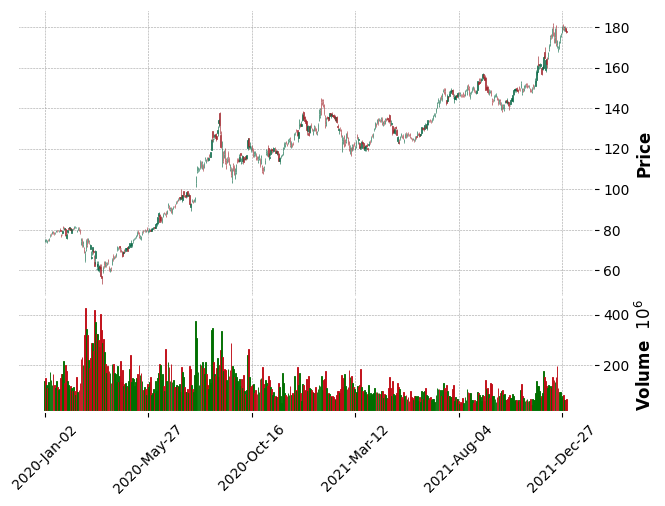

In [8]:
# !pip install mplfinance
import matplotlib.pyplot as plt
import yfinance as yf
import mplfinance as mpf

# Download historical data for a stock (e.g., Apple)
stock_symbol = "AAPL"
stock_data = yf.download(stock_symbol, start="2020-01-01", end="2022-01-01")

# Specify the savefig dictionary with filename and other parameters (optional)
save_params = dict(fname='apple_candlestick_chart.png', dpi=100, pad_inches=0.25)

# Plot and save the candlestick chart
mpf.plot(stock_data, type='candle', style='charles', volume=True, savefig=save_params)


mpf.plot(stock_data, type='candle', style='charles', volume=True)
plt.show()


# Test the Image Just Created

In [9]:
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load the image
img_path = '/content/apple_candlestick_chart.png'
img = image.load_img(img_path, target_size=(150, 150))  # Resize image to match model expected input

# Convert the image to a numpy array and normalize
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.  # Normalize to 0-1 range

# Define a simple model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Assuming binary classification (up/down)
])

# Since we're not training the model, the weights are random

prediction = model.predict(img_array)
print(f"Mock Prediction (Untrained): {prediction[0]}")
# This will just give a random output

1/1 [==============================] - 0s 86ms/step
Mock Prediction (Untrained): [0.48162803]


# Try With Generation of Multiple Charts for Multiple Tickers

# Ignore This For Now

In [ ]:
!pip install mplfinance
import matplotlib.pyplot as plt
import yfinance as yf
import mplfinance as mpf

# List of stock symbols to download and generate candlestick charts for
stock_symbols = ["AAPL", "GOOGL", "MSFT", "AMZN", "META", "TSLA", "NFLX", "NVDA", "BABA", "JPM"]


def download_and_generate_charts(stock_symbols, window_size=5):
    labels = {}  # Dictionary to hold the labels for each stock symbol

    for symbol in stock_symbols:
        # Download historical data
        data = yf.download(symbol, start="2020-01-01", end="2020-03-01")

        for i in range(len(data) - window_size):
            # Select data window
            data_window = data.iloc[i:i+window_size]

            # Define filename for the chart image
            filename = f"{symbol}_{i}.png"

            # Plot and save the candlestick chart
            mpf.plot(data_window, type='candle', style='charles', volume=True,
                     savefig=dict(fname=filename, dpi=100, pad_inches=0.25))

            # Determine the label based on price movement
            try:
                last_day_close = data_window['Close'].iloc[-1]
                next_day_open = data.iloc[i + window_size]['Open']
                label = 1 if next_day_open > last_day_close else 0  # 1 for up, 0 for down
                labels[filename] = label
            except IndexError:  # Handle the case where there's no next day
                # This might happen at the end of the dataset
                labels[filename] = None

    return labels

# Generate charts and labels
labels = download_and_generate_charts(stock_symbols)
# print(labels)



# mpf.plot(stock_data, type='candle', style='charles', volume=True)
# plt.show()


# My Method

# Generate Images and Labels

In [15]:
!pip install mplfinance
import matplotlib.pyplot as plt
import yfinance as yf
import mplfinance as mpf
from datetime import datetime, timedelta

# List of stock symbols to download and generate candlestick charts for
stock_symbols = ["AAPL", "GOOGL", "MSFT", "AMZN", "META", "TSLA", "NFLX", "NVDA", "BABA", "JPM"]


def download_and_generate_charts(stock_symbols):
    labels = {}  # Dictionary to hold the labels for each stock symbol
    start_date = "2020-01-01"
    end_date ="2020-03-01"

    # Get next day
    new_end = datetime.strptime(end_date, "%Y-%m-%d") + timedelta(days=3)
    new_end_date = new_end.strftime("%Y-%m-%d")

    for symbol in stock_symbols:
        # Download historical data
        data = yf.download(symbol, start=start_date, end=end_date)

        # Download subsequent data to see if it went up or not
        subseq_data = yf.download(symbol, start=end_date, end = new_end_date)

        # Define filename for the chart image
        filename = f"{symbol}.png"

        # Plot and save the candlestick chart
        mpf.plot(data, type='candle', style='charles', volume=True,
                savefig=dict(fname=filename, dpi=100, pad_inches=0.25))

        # Determine the label based on price movement
        try:
            last_day_close = data['Close'].iloc[-1]
            next_day_open = subseq_data.iloc[-1]['Close']
            label = 1 if next_day_open > last_day_close else 0  # 1 for up, 0 for down

            # print(f"symbol: {symbol} \t p1: {last_day_close} \t p2: {next_day_open} \t label: {label} \n")

            labels[filename] = label
        except IndexError:  # Handle the case where there's no next day
            # This might happen at the end of the dataset
            labels[filename] = None

    return labels

# Generate charts and labels
labels = download_and_generate_charts(stock_symbols)
# print(labels)



# mpf.plot(stock_data, type='candle', style='charles', volume=True)
# plt.show()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

# Create, Train, and Evaluate Model

In [16]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Define image dimensions
img_width, img_height = 150, 150

# List to store model performance metrics
model_metrics = []

# Loop through each image in the labels dictionary
for filename, label in labels.items():
    try:
        # Load image
        img = load_img(filename, target_size=(img_width, img_height))
        img_array = img_to_array(img) / 255.0  # Normalize pixel values

        # Expand dimensions to match expected input shape of the model
        img_array = np.expand_dims(img_array, axis=0)

        # Split dataset into training and validation sets (using the same image for simplicity)
        X_train, X_val, y_train, y_val = img_array, img_array, np.array([label]), np.array([label])

        # Define CNN model
        model = Sequential([
            Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
            MaxPooling2D((2, 2)),
            Conv2D(64, (3, 3), activation='relu'),
            MaxPooling2D((2, 2)),
            Conv2D(128, (3, 3), activation='relu'),
            MaxPooling2D((2, 2)),
            Flatten(),
            Dense(128, activation='relu'),
            Dense(1, activation='sigmoid')
        ])

        # Compile model
        model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

        # Train model
        model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val), verbose=0)

        # Evaluate model
        _, accuracy = model.evaluate(X_val, y_val, verbose=0)
        model_metrics.append((filename, accuracy))

        print(f"Model for {filename}: Accuracy = {accuracy}")
    except Exception as e:
        print(f"Error processing {filename}: {str(e)}")


Model for AAPL.png: Accuracy = 1.0
Model for GOOGL.png: Accuracy = 1.0
Model for MSFT.png: Accuracy = 1.0
Model for AMZN.png: Accuracy = 1.0
Model for META.png: Accuracy = 1.0
Model for TSLA.png: Accuracy = 1.0
Model for NFLX.png: Accuracy = 1.0
Model for NVDA.png: Accuracy = 1.0
Model for BABA.png: Accuracy = 1.0
Model for JPM.png: Accuracy = 1.0


TODO: Add this to Github, add a buy, sell, or do nothing system/label, try to configure model in a better way.